In [38]:
# Import dependencies
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from joblib import dump

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import pandas as pd

In [39]:
# Necessary code to prevent kernel death
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

# Load the Data                                                                                    

In [40]:
# Load dataset from sklearn
cancer = load_breast_cancer()

# Display dataset information
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

# Data Pre-processing

In [63]:
# Set feature and targets
X = cancer.data
y = cancer.target

# Split into training and testing data; not sure if y should be stratified. Must look into this more
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

# Create a StandardScaler model and fit it to the training data
X_scaler = StandardScaler().fit(X_train.reshape(-1, 1))
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

dump(X_scaler, "scaler.out")
X_scaler

StandardScaler(copy=True, with_mean=True, with_std=True)

# Create Logistic Regression Model

In [6]:
log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)
log_score = log_model.score(X_test_scaled, y_test)
print(log_score)

0.916083916083916


/anaconda3/envs/PythonData/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# Create SVM

In [7]:
# Create the GridSearchCV model
param_grid = {'C': [1, 5, 10],
              'gamma': [0.0001, 0.001, 0.01],
             'kernel': ['rbf', 'linear', 'sigmoid']}
svc = SVC()
grid = GridSearchCV(svc, param_grid, verbose=3, cv=3)

# Train the model with GridSearch
grid.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] ....... C=1, gamma=0.0001, kernel=rbf, score=0.641, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] ....... C=1, gamma=0.0001, kernel=rbf, score=0.627, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] ....... C=1, gamma=0.0001, kernel=rbf, score=0.627, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=linear ................................
[CV] .... C=1, gamma=0.0001, kernel=linear, score=0.951, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=linear ................................
[CV] .... C=1, gamma=0.0001, kernel=linear, score=0.923, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=linear ................................
[CV] .... C=1, gamma=0.0001, kernel=linear, score=0.937, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=sigmoid ...............................
[CV] ... C=1, ga

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ..... C=1, gamma=0.01, kernel=sigmoid, score=0.915, total=   0.0s
[CV] C=5, gamma=0.0001, kernel=rbf ...................................
[CV] ....... C=5, gamma=0.0001, kernel=rbf, score=0.831, total=   0.0s
[CV] C=5, gamma=0.0001, kernel=rbf ...................................
[CV] ....... C=5, gamma=0.0001, kernel=rbf, score=0.810, total=   0.0s
[CV] C=5, gamma=0.0001, kernel=rbf ...................................
[CV] ....... C=5, gamma=0.0001, kernel=rbf, score=0.810, total=   0.0s
[CV] C=5, gamma=0.0001, kernel=linear ................................
[CV] .... C=5, gamma=0.0001, kernel=linear, score=0.944, total=   0.0s
[CV] C=5, gamma=0.0001, kernel=linear ................................
[CV] .... C=5, gamma=0.0001, kernel=linear, score=0.923, total=   0.0s
[CV] C=5, gamma=0.0001, kernel=linear ................................
[CV] .... C=5, gamma=0.0001, kernel=linear, score=0.923, total=   0.0s
[CV] C=5, gamma=0.0001, kernel=sigmoid ...............................
[CV] .

[Parallel(n_jobs=1)]: Done  81 out of  81 | elapsed:    0.5s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 5, 10], 'gamma': [0.0001, 0.001, 0.01],
                         'kernel': ['rbf', 'linear', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [8]:
# Find the best parameters based on gridsearch
svm_param = grid.best_params_
print(svm_param)
print(grid.best_score_)

{'C': 1, 'gamma': 0.0001, 'kernel': 'linear'}
0.9366197183098591


In [9]:
# Fit model based on best parameters
svm_model = SVC(C=1, gamma=0.0001, kernel="linear")
svm_model = svm_model.fit(X_train_scaled, y_train)
svm_score = svm_model.score(X_test_scaled, y_test)
print(svm_score)

0.9300699300699301


# Random Forest Classifier

In [10]:
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train_scaled, y_train)
rf_score = rf.score(X_test_scaled, y_test)
print(rf_score)

0.958041958041958


In [11]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf.feature_importances_
importances
# tells you the importance of the feature - spits out an array with the numbers 

array([0.03985512, 0.01337559, 0.02850109, 0.05858892, 0.00847826,
       0.01608477, 0.03129576, 0.09465937, 0.0055895 , 0.0024549 ,
       0.01216342, 0.00675367, 0.01755392, 0.02562967, 0.00426078,
       0.00500517, 0.0054112 , 0.00326366, 0.0035004 , 0.00564973,
       0.12311472, 0.01580659, 0.14470424, 0.09971488, 0.01069984,
       0.02005297, 0.03424419, 0.14412192, 0.01461922, 0.00484656])

In [13]:
# We can sort the features by their importance
# by fitting the numbers form n array - we know now what is the most important feature 
sorted(zip(rf.feature_importances_, cancer.feature_names), reverse=True)

[(0.14470423603340854, 'worst perimeter'),
 (0.14412191940351193, 'worst concave points'),
 (0.12311471762026707, 'worst radius'),
 (0.09971487710052068, 'worst area'),
 (0.0946593670429444, 'mean concave points'),
 (0.05858892464179406, 'mean area'),
 (0.03985512097342399, 'mean radius'),
 (0.03424418957278412, 'worst concavity'),
 (0.03129575581213483, 'mean concavity'),
 (0.028501088815523486, 'mean perimeter'),
 (0.02562966884092452, 'area error'),
 (0.020052967222271317, 'worst compactness'),
 (0.017553919567948394, 'perimeter error'),
 (0.016084770968155724, 'mean compactness'),
 (0.015806588868203606, 'worst texture'),
 (0.01461922214018542, 'worst symmetry'),
 (0.013375592338031934, 'mean texture'),
 (0.012163416696995492, 'radius error'),
 (0.010699836819772674, 'worst smoothness'),
 (0.008478260677959362, 'mean smoothness'),
 (0.006753671433032826, 'texture error'),
 (0.005649725296543476, 'fractal dimension error'),
 (0.00558949873499007, 'mean symmetry'),
 (0.00541119870992

# Desicion Tree Classifier 

In [16]:
# Assign & fit the model 
clf = tree.DecisionTreeClassifier()
clf = clf.fit(cancer.data, cancer.target)

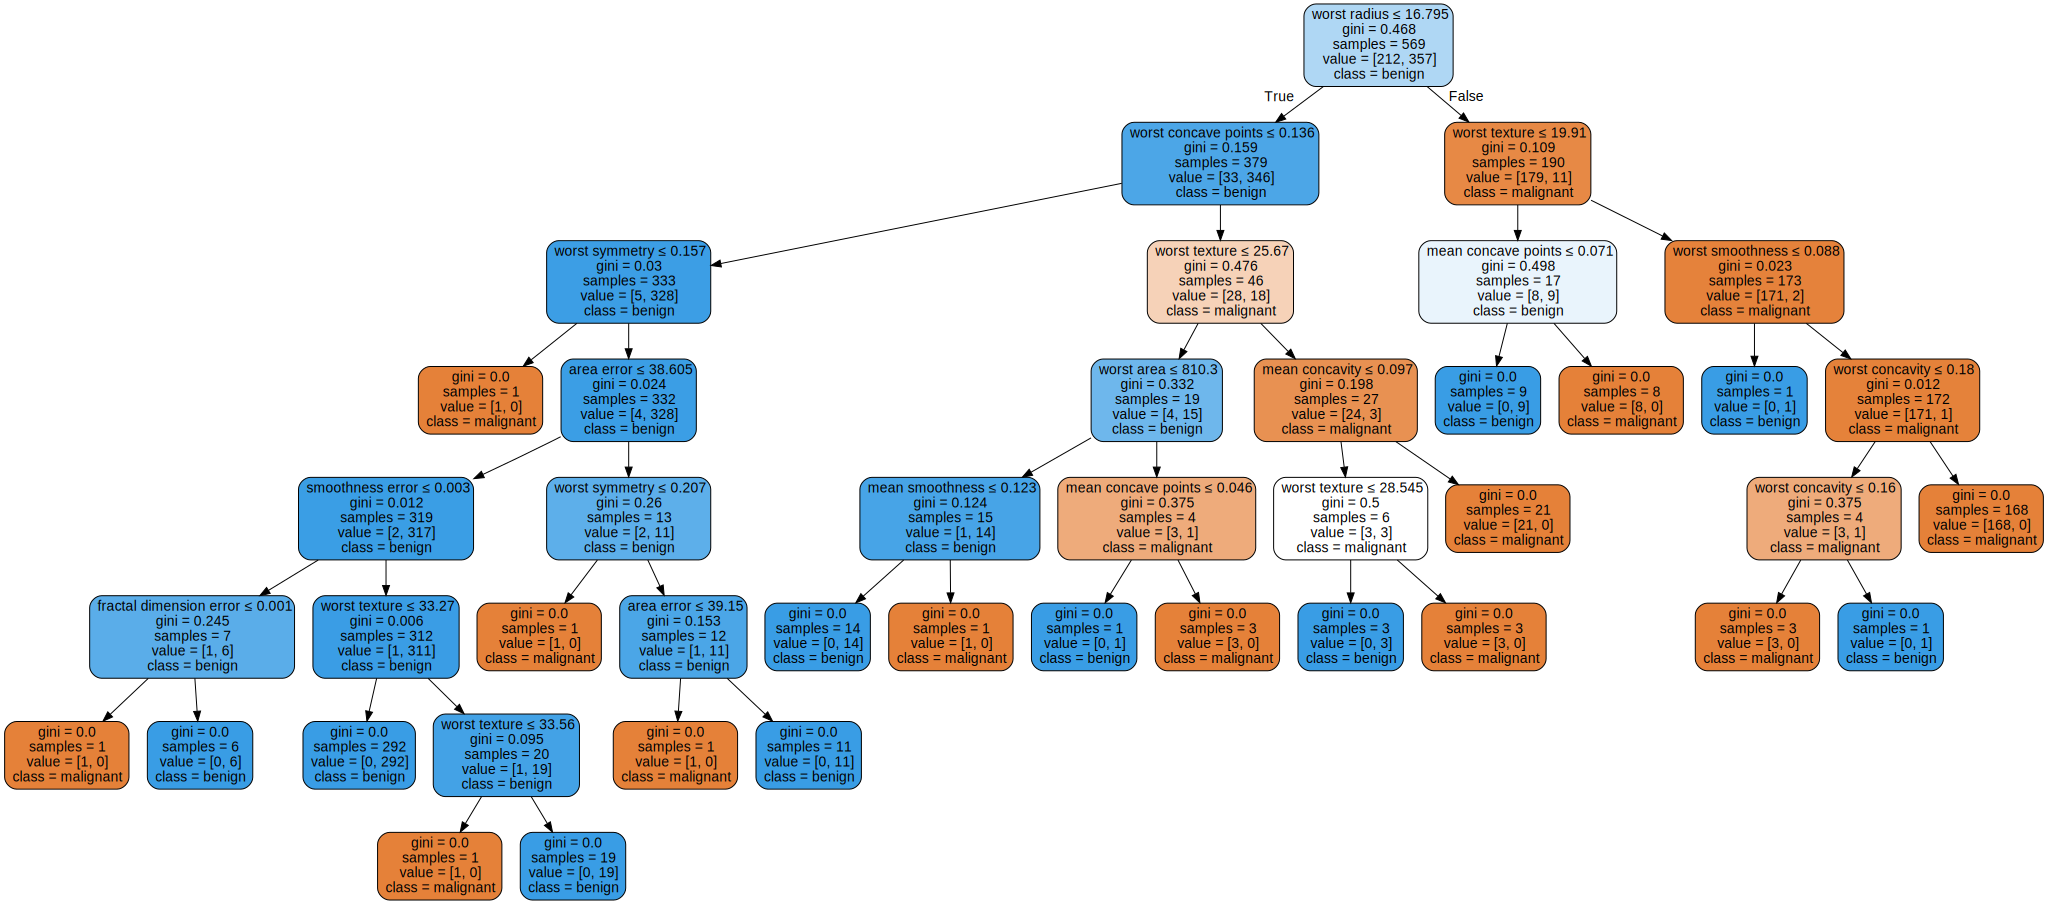

In [17]:
import graphviz 
dot_data = tree.export_graphviz(
    clf, out_file = None, 
    feature_names=cancer.feature_names,  
    class_names = cancer.target_names,  
    filled = True, rounded = True,  
    special_characters = True)  

import pydotplus
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('cancer.png')

graph = graphviz.Source(dot_data)  
graph 

In [52]:
# Get the score of the accuracy
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf_score = clf.score(X_test, y_test)
print(clf_score)

0.916083916083916


# KNN Classifier

k: 1, Train/Test Score: 1.000/0.937
k: 3, Train/Test Score: 0.951/0.930
k: 5, Train/Test Score: 0.946/0.930
k: 7, Train/Test Score: 0.946/0.944
k: 9, Train/Test Score: 0.939/0.944
k: 11, Train/Test Score: 0.937/0.951
k: 13, Train/Test Score: 0.939/0.944
k: 15, Train/Test Score: 0.939/0.930
k: 17, Train/Test Score: 0.932/0.930
k: 19, Train/Test Score: 0.932/0.930
k: 21, Train/Test Score: 0.930/0.930
k: 23, Train/Test Score: 0.932/0.937
k: 25, Train/Test Score: 0.927/0.937
k: 27, Train/Test Score: 0.927/0.930
k: 29, Train/Test Score: 0.927/0.923
k: 31, Train/Test Score: 0.927/0.923
k: 33, Train/Test Score: 0.927/0.923
k: 35, Train/Test Score: 0.927/0.923
k: 37, Train/Test Score: 0.925/0.923
k: 39, Train/Test Score: 0.927/0.923
k: 41, Train/Test Score: 0.925/0.923
k: 43, Train/Test Score: 0.923/0.923
k: 45, Train/Test Score: 0.920/0.930
k: 47, Train/Test Score: 0.918/0.930
k: 49, Train/Test Score: 0.918/0.930


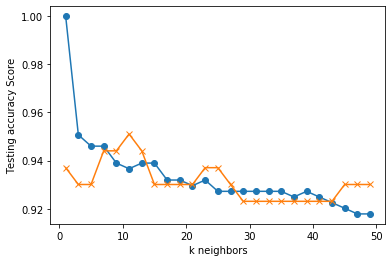

In [20]:
# Loop through different k values to see which has the highest accuracy
train_scores = []
test_scores = []
for k in range(1, 50, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
# Plot the testing and training scores for each k for visual representation
plt.plot(range(1, 50, 2), train_scores, marker='o')
plt.plot(range(1, 50, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [24]:
# Set model to k which provides the best accuracy where the classifier starts to stablize
knn = KNeighborsClassifier(n_neighbors=27)
knn.fit(X_train, y_train)
knn_score = knn.score(X_test, y_test)
print(knn_score)

0.9300699300699301


# Deep Learning Model

In [42]:
# Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

In [43]:
# Convert encoded labels to one-hot-encoding
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

In [44]:
# Create model and add layers 
deep_model = Sequential()
deep_model.add(Dense(units=70, activation='relu', input_dim=30))
deep_model.add(Dense(units=70, activation='relu'))
deep_model.add(Dense(units=2, activation='softmax'))

In [45]:
# Compile and fit the model
deep_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [46]:
# Print summary of the model
deep_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 70)                2170      
_________________________________________________________________
dense_4 (Dense)              (None, 70)                4970      
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 142       
Total params: 7,282
Trainable params: 7,282
Non-trainable params: 0
_________________________________________________________________


In [47]:
# Fit the model
deep_model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=200,
    shuffle=True,
    verbose=2
)

Epoch 1/200
426/426 - 0s - loss: 0.6183 - acc: 0.7136
Epoch 2/200
426/426 - 0s - loss: 0.4696 - acc: 0.8803
Epoch 3/200
426/426 - 0s - loss: 0.3403 - acc: 0.8850
Epoch 4/200
426/426 - 0s - loss: 0.2630 - acc: 0.9061
Epoch 5/200
426/426 - 0s - loss: 0.2289 - acc: 0.9178
Epoch 6/200
426/426 - 0s - loss: 0.2146 - acc: 0.9202
Epoch 7/200
426/426 - 0s - loss: 0.2177 - acc: 0.9061
Epoch 8/200
426/426 - 0s - loss: 0.2067 - acc: 0.9014
Epoch 9/200
426/426 - 0s - loss: 0.2047 - acc: 0.9108
Epoch 10/200
426/426 - 0s - loss: 0.2040 - acc: 0.9155
Epoch 11/200
426/426 - 0s - loss: 0.2017 - acc: 0.9038
Epoch 12/200
426/426 - 0s - loss: 0.1985 - acc: 0.9272
Epoch 13/200
426/426 - 0s - loss: 0.1920 - acc: 0.9155
Epoch 14/200
426/426 - 0s - loss: 0.1953 - acc: 0.9225
Epoch 15/200
426/426 - 0s - loss: 0.1880 - acc: 0.9155
Epoch 16/200
426/426 - 0s - loss: 0.1904 - acc: 0.9202
Epoch 17/200
426/426 - 0s - loss: 0.1857 - acc: 0.9131
Epoch 18/200
426/426 - 0s - loss: 0.1870 - acc: 0.9319
Epoch 19/200
426/42

426/426 - 0s - loss: 0.1215 - acc: 0.9507
Epoch 150/200
426/426 - 0s - loss: 0.1325 - acc: 0.9413
Epoch 151/200
426/426 - 0s - loss: 0.1375 - acc: 0.9390
Epoch 152/200
426/426 - 0s - loss: 0.1162 - acc: 0.9531
Epoch 153/200
426/426 - 0s - loss: 0.1423 - acc: 0.9460
Epoch 154/200
426/426 - 0s - loss: 0.1207 - acc: 0.9484
Epoch 155/200
426/426 - 0s - loss: 0.1179 - acc: 0.9554
Epoch 156/200
426/426 - 0s - loss: 0.1319 - acc: 0.9390
Epoch 157/200
426/426 - 0s - loss: 0.1283 - acc: 0.9507
Epoch 158/200
426/426 - 0s - loss: 0.1248 - acc: 0.9460
Epoch 159/200
426/426 - 0s - loss: 0.1445 - acc: 0.9390
Epoch 160/200
426/426 - 0s - loss: 0.1133 - acc: 0.9554
Epoch 161/200
426/426 - 0s - loss: 0.1186 - acc: 0.9507
Epoch 162/200
426/426 - 0s - loss: 0.1223 - acc: 0.9484
Epoch 163/200
426/426 - 0s - loss: 0.1208 - acc: 0.9484
Epoch 164/200
426/426 - 0s - loss: 0.1184 - acc: 0.9507
Epoch 165/200
426/426 - 0s - loss: 0.1139 - acc: 0.9507
Epoch 166/200
426/426 - 0s - loss: 0.1331 - acc: 0.9507
Epoch 

In [48]:
# Make deep model predictions
encoded_predictions = deep_model.predict_classes(X_test_scaled[:10])
prediction_labels = label_encoder.inverse_transform(encoded_predictions)
print(f"Predicted classes: {prediction_labels}")
print(f"Actual Labels: {list(y_test)[:10]}")

Predicted classes: [1 0 1 1 1 0 0 0 0 1]
Actual Labels: [1, 0, 1, 1, 0, 0, 0, 0, 0, 1]


In [49]:
# Determine deep model score
dm_score = deep_model.evaluate(X_test_scaled, y_test_categorical)
print(dm_score)
# print(X_test_scaled)

143/143 [==============================] - 0s 339us/sample - loss: 0.1183 - acc: 0.9441
[0.1183420623932685, 0.9440559]


# Determine and Save Best Model

In [53]:
# Print out all scores
print(f"Logistic Regression Model Score: {log_score}")
print(f"SVM Score: {svm_score}")
print(f"Random Forest Classifier Score: {rf_score}")
print(f"Decision Tree Classifier Score: {clf_score}")
print(f"KNN Model Score: {knn_score}")
print(f"Deep Learning Model Score: {dm_score}")

Logistic Regression Model Score: 0.916083916083916
SVM Score: 0.9300699300699301
Random Forest Classifier Score: 0.958041958041958
Decision Tree Classifier Score: 0.916083916083916
KNN Model Score: 0.9300699300699301
Deep Learning Model Score: [0.1183420623932685, 0.9440559]


In [54]:
# Save best model - Random Forest Classifier
dump(rf, 'rf_model.joblib')

['rf_model.joblib']